In [11]:
from keras.models import Model,Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Input

In [3]:
from keras.datasets import fashion_mnist

In [5]:
(x_train0,_),(x_test0,_)=fashion_mnist.load_data()

In [7]:
x_train=x_train0.astype('float32')/255
x_test=x_test0.astype('float32')/255

In [8]:
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
def autoencoder(img_size):
    conv1=Conv2D(32,(3,3),activation='relu',padding='same')(img_size)#28X28X32
    maxpool1=MaxPooling2D(pool_size=(2,2))(conv1)#14X14X32
    conv2=Conv2D(64,(3,3),activation='relu',padding='same')(maxpool1)#14X14X64
    maxpool2=MaxPooling2D(pool_size=(2,2))(conv2)#7X7X64
    conv3=Conv2D(128,(3,3),activation='relu',padding='same')(maxpool2)#7X7X128
    
    conv4=Conv2D(128,(3,3),activation='relu',padding='same')(conv3)#7X7X128
    conv5=UpSampling2D((2,2))(conv4)#14X14X128
    conv6=Conv2D(64,(3,3),activation='relu',padding='same')(conv5)#14X14X64
    conv7=UpSampling2D((2,2))(conv6)#28X28X64
    decoded=Conv2D(1,(3,3),activation='relu',padding='same')(conv7)#28X28X1
    return decoded

In [24]:
img_size=Input(shape=(x_train.shape[1],x_train.shape[1],1))

In [25]:
auto=autoencoder(img_size)

In [26]:
autoencoder=Model(inputs=img_size,outputs=auto)

In [30]:
autoencoder.compile(optimizer="adam",loss="mean_squared_error")

In [31]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)         147584    
__________

In [32]:
autoencoder.fit(x_train,x_train,shuffle=True,epochs=50,batch_size=256,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 638s 13ms/step - loss: 0.0153 - val_loss: 0.0082
Epoch 2/50
48000/48000 [==============================] - 670s 14ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 3/50
48000/48000 [==============================] - 685s 14ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 4/50
48000/48000 [==============================] - 667s 14ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 5/50
48000/48000 [==============================] - 662s 14ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/50
48000/48000 [==============================] - 659s 14ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/50
48000/48000 [==============================] - 649s 14ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/50
48000/48000 [==============================] - 635s 13ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 9/50
48000/48000 [==============================] - 676s 14ms/step - loss: 0.0029 - val_

KeyboardInterrupt: 

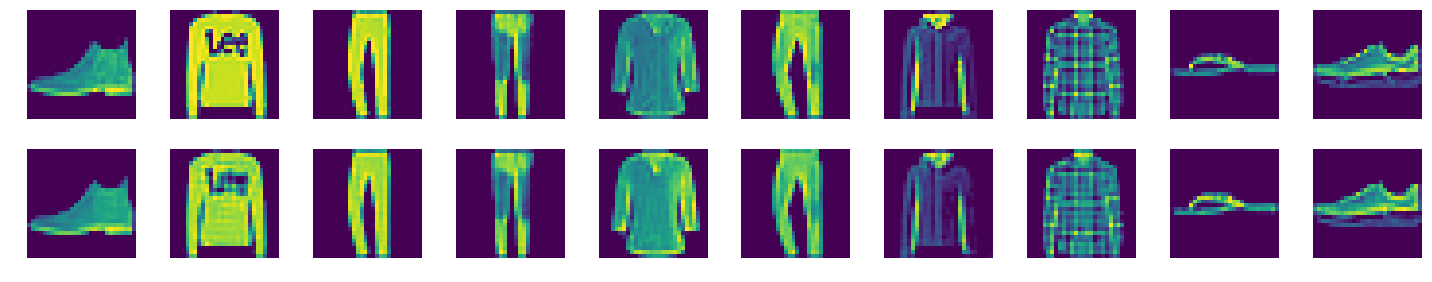

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
reconstructed_img=autoencoder.predict(x_test)
plt.figure(figsize=(20,4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis('off')

    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(reconstructed_img[i].reshape(28, 28))
    plt.axis('off')

plt.tight_layout()
plt.show()
